##**Preprocessing and Setup**

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
globalPath = "/content/drive/My Drive/ESE 545/Project 3/"
# /content/drive/My Drive/ESE 545/Project 3/recommendationMovie.csv
recommendationMoviesPath  = globalPath+"recommendationMovie.csv"

In [0]:
recommendationMoviesDf = pd.read_csv(recommendationMoviesPath, header=None)
recommendationMoviesDf.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,14959,14960,14961,14962,14963,14964,14965,14966,14967,14968,14969,14970,14971,14972,14973,14974,14975,14976,14977,14978,14979,14980,14981,14982,14983,14984,14985,14986,14987,14988,14989,14990,14991,14992,14993,14994,14995,14996,14997,14998
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
print(recommendationMoviesDf.shape)

(1005, 14999)


In [0]:
def calculateInstantaneuosRegret(expectedFullRewards, expectedPartialRewards, armSelectedInCurItr):
  bestArmSoFar = np.argmax(expectedFullRewards)
  instantaneousRegret = expectedFullRewards[bestArmSoFar] - expectedPartialRewards[armSelectedInCurItr]
  return instantaneousRegret


##**Partial Feedback**


###Epsilon Greedy


In [0]:
def epsilonGreedyNew(numArms, numTrials, dataFrame, epsilonMult = 100):
  expectedPartialRewards = np.zeros(numArms)
  selectionFrequencyForArms = np.ones(numArms)
  positiveRewardFrequencyForArms = np.zeros(numArms)
  
  expectedFullRewards = np.zeros(numArms)

  actualRewards = np.zeros(numTrials)
  regrets = np.zeros(numTrials)
  explr = 0
  explt = 0
  for trialIter in range(numTrials):
    epsilon = (epsilonMult /(trialIter+1))
    r = random.random()
    # print(r, epsilon)
    if(r<epsilon):
      # print("explore")
      explr+=1
      selectedArmIndex = np.random.randint(0,numArms,1)
    else:
      # print("exploit")
      explt+=1
      selectedArmIndex = np.argmax(positiveRewardFrequencyForArms / selectionFrequencyForArms)
    actualRewards[trialIter] = dataFrame.iloc[selectedArmIndex, trialIter]
    if(actualRewards[trialIter] == 1.0):
        positiveRewardFrequencyForArms[selectedArmIndex]+=1
    selectionFrequencyForArms[selectedArmIndex]+=1

    expectedFullRewards  = expectedFullRewards + (dataFrame[trialIter].to_numpy())
    # print("expected full res", expectedFullRewards)

    expectedPartialRewards = (positiveRewardFrequencyForArms/ selectionFrequencyForArms)
    regrets[trialIter] = calculateInstantaneuosRegret(expectedFullRewards/(trialIter+1), expectedPartialRewards, selectedArmIndex)
    # print(regrets[trialIter], np.sum(expectedFullRewards), np.sum(expectedPartialRewards))
    # if(trialIter == 2):
      # break
  # print("explr", explr, "Explt", explt)
  # print(regrets)
  # print("------------------------------")
  return actualRewards, regrets


In [0]:
actualRewardsEpsilon1,  regretsEpsilon1 = epsilonGreedyNew(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, epsilonMult=1)
actualRewardsEpsilon2,  regretsEpsilon2 = epsilonGreedyNew(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, epsilonMult=10)
actualRewardsEpsilon3,  regretsEpsilon3 = epsilonGreedyNew(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, epsilonMult=100)
actualRewardsEpsilon4,  regretsEpsilon4 = epsilonGreedyNew(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, epsilonMult=1000)

Text(0, 0.5, 'Regret')

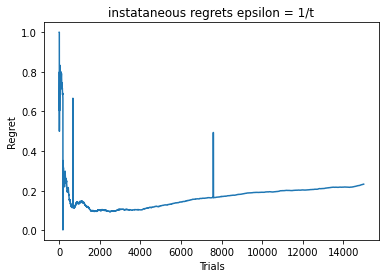

In [0]:
plt.plot(regretsEpsilon1)
plt.title("instataneous regrets epsilon = 1/t")
plt.xlabel("Trials")
plt.ylabel("Regret")


Text(0, 0.5, 'Regret')

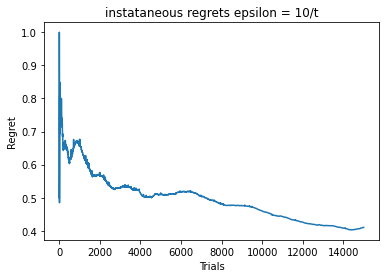

In [0]:
plt.plot(regretsEpsilon2)
plt.title("instataneous regrets epsilon = 10/t")
plt.xlabel("Trials")
plt.ylabel("Regret")

Text(0, 0.5, 'Regret')

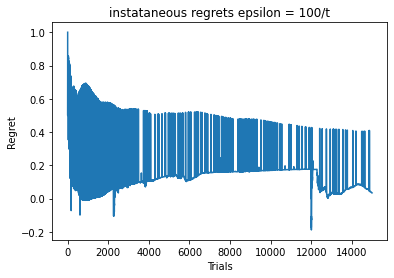

In [0]:
plt.plot(regretsEpsilon3)
plt.title("instataneous regrets epsilon = 100/t")
plt.xlabel("Trials")
plt.ylabel("Regret")

Text(0, 0.5, 'Regret')

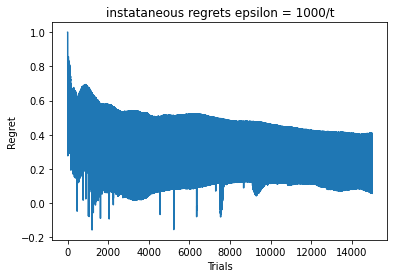

In [0]:
plt.plot(regretsEpsilon4)
plt.title("instataneous regrets epsilon = 1000/t")
plt.xlabel("Trials")
plt.ylabel("Regret")

Text(0.5, 1.02, 'effect of changing epsilon on regret')

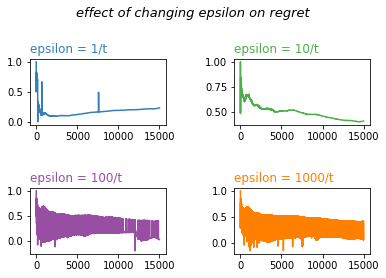

In [0]:
regrets = np.zeros((4, regretsEpsilon1.shape[0]))
regrets[0] = regretsEpsilon1
regrets[1] = regretsEpsilon2
regrets[2] = regretsEpsilon3
regrets[3] = regretsEpsilon4
lebels = ["epsilon = 1/t", "epsilon = 10/t", "epsilon = 100/t", "epsilon = 1000/t"]
palette = plt.get_cmap('Set1')
for num in range(1,5):
  plt.subplot(2,2, num)
  plt.plot(regrets[num-1], color=palette(num), label = lebels[num-1])
  plt.title(lebels[num-1], loc='left', fontsize=12, fontweight=0, color=palette(num))
  plt.tight_layout(pad=3.0)
plt.suptitle("effect of changing epsilon on regret", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)


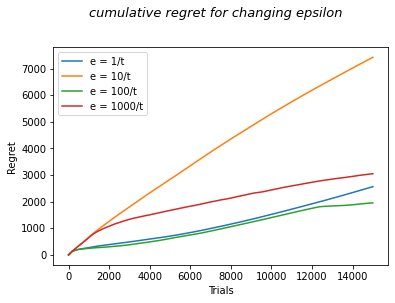

In [0]:
plt.plot(np.cumsum(regretsEpsilon1), label = "e = 1/t")
plt.plot(np.cumsum(regretsEpsilon2), label = "e = 10/t")
plt.plot(np.cumsum(regretsEpsilon3), label = "e = 100/t")
plt.plot(np.cumsum(regretsEpsilon4), label = "e = 1000/t")
plt.legend()
plt.xlabel("Trials")
plt.ylabel("Regret")
plt.suptitle("cumulative regret for changing epsilon", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
plt.show()

Text(0, 0.5, 'Variant')

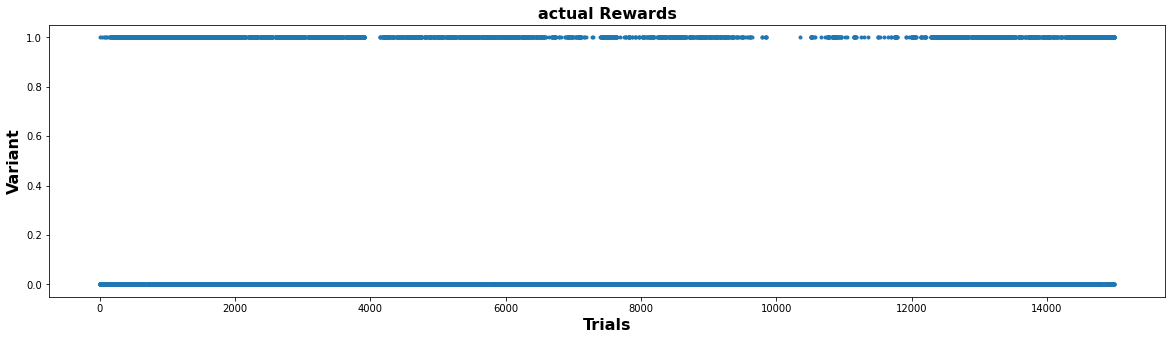

In [0]:
x_ax = np.arange(recommendationMoviesDf.shape[1])
cmap = plt.get_cmap("tab10", 3)
plt.figure(figsize=(20,5))
plt.scatter(x_ax,actualRewardsEpsilon3, cmap=cmap, marker=".", alpha=1)
plt.title("actual Rewards", fontsize=16, fontweight="bold")
plt.xlabel("Trials", fontsize=16, fontweight="bold")
plt.ylabel("Variant", fontsize=16, fontweight="bold")



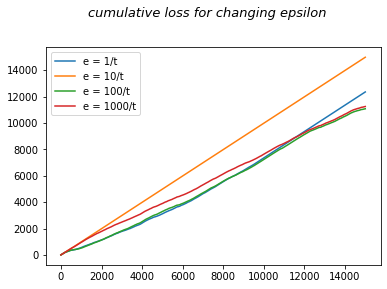

In [0]:
losses1 = np.cumsum(np.ones(recommendationMoviesDf.shape[1]) - actualRewardsEpsilon1)
losses2 = np.cumsum(np.ones(recommendationMoviesDf.shape[1]) - actualRewardsEpsilon2)
losses3 = np.cumsum(np.ones(recommendationMoviesDf.shape[1]) - actualRewardsEpsilon3)
losses4 = np.cumsum(np.ones(recommendationMoviesDf.shape[1]) - actualRewardsEpsilon4)

plt.plot(losses1, label = "e = 1/t")
plt.plot(losses2, label = "e = 10/t")
plt.plot(losses3, label = "e = 100/t")
plt.plot(losses4, label = "e = 1000/t")
plt.suptitle("cumulative loss for changing epsilon", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

plt.legend()

In [0]:
print(np.sum(actualRewardsEpsilon3))

3925.0


In [0]:
print(np.sum(regretsEpsilon3))

1954.8070277929942


In [0]:
print(np.mean(regretsEpsilon3))

0.13032915713000828


###UCB1

In [0]:
def UCB1(numArms, numTrials, dataFrame, mult):
  actualRewards = np.zeros((numTrials))
  expectedPartialRewards = np.zeros((numArms))
  expectedFullRewards = np.zeros((numArms))
  selectionFrequency = np.zeros((numArms))
  

  regrets = np.zeros((numTrials))
 
  # 0 - > k trials
  for k in range(numArms):
    expectedPartialRewards[k] = dataFrame.iloc[k,k] 
    expectedFullRewards += (dataFrame[k].to_numpy() - expectedFullRewards)/(k+1)
    actualRewards[k] = dataFrame.iloc[k,k]
    selectionFrequency[k]+=1
    

  # print(np.sum(expectedRewardsForArms)) 53
  # print(np.sum(actualRewards)) 53
  # print(np.sum(selectionFrequencyForArms)) 1004

  # k -> T trials
  # print("numTrials", numTrials)
  # print("numTrials - numArms", numTrials - numArms)

  for t in range(numArms+1, numTrials):
    explorationTermForArms = np.sqrt(np.ones(numArms)*mult*np.log(2*t)/selectionFrequency)
    UCB = expectedPartialRewards + explorationTermForArms
    
    winners = np.argwhere(UCB == np.amax(UCB))
    # armSelectedIndex =  np.argmax(expectedRewardsForArms[winners])
    val = random.randint(0,len(winners)-1)
    armSelectedIndex = winners[val]
    # armSelectedIndex = np.argmax(UCB)
    
    actualRewards[t] = dataFrame.iloc[armSelectedIndex, t]
    selectionFrequency[armSelectedIndex] +=1
    expectedPartialRewards[armSelectedIndex] += (actualRewards[t] - expectedPartialRewards[armSelectedIndex])/selectionFrequency[armSelectedIndex]
    expectedFullRewards += (dataFrame[t].to_numpy() - expectedFullRewards)/(t+1)
    regrets[t] = calculateInstantaneuosRegret(expectedFullRewards,  expectedPartialRewards, armSelectedIndex)
  
  return actualRewards, regrets

In [0]:
actualRewardsUCB2, regretsUCB2 = UCB1(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, mult=2)
actualRewardsUCB1, regretsUCB1 = UCB1(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, mult=1)
actualRewardsUCB5, regretsUCB5 = UCB1(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, mult=1/2)
actualRewardsUCB4, regretsUCB4 = UCB1(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, mult=1/4)

Text(0.5, 1.0, 'regret delta = 1/t^4')

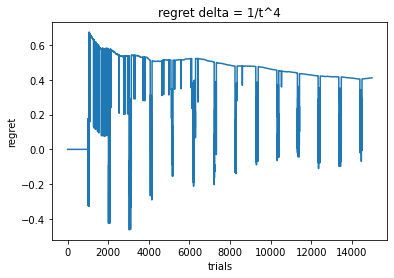

In [0]:
plt.plot(regretsUCB2)
plt.xlabel("trials")
plt.ylabel("regret")
plt.title("regret delta = 1/t^4")
# plt.plot(regretsEpsilon3)

Text(0.5, 1.0, 'regret delta = 1/t^2')

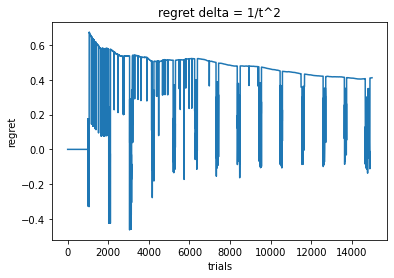

In [0]:
plt.plot(regretsUCB1)
plt.xlabel("trials")
plt.ylabel("regret")
plt.title("regret delta = 1/t^2")
# plt.plot(regretsEpsilon3)

Text(0.5, 1.0, 'regret delta = 1/t^0.5')

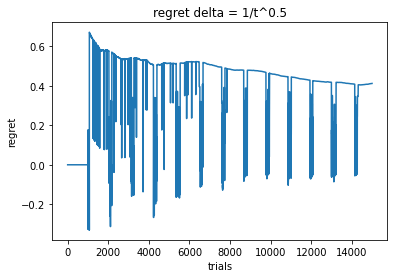

In [0]:
plt.plot(regretsUCB5)
plt.xlabel("trials")
plt.ylabel("regret")
plt.title("regret delta = 1/t^0.5")

Text(0.5, 1.0, 'regret delta = 1/t^0.25')

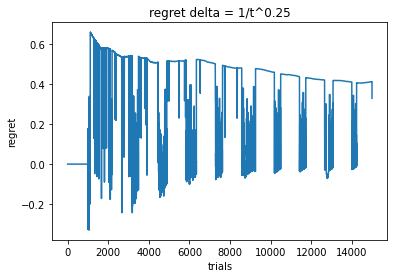

In [0]:
plt.plot(regretsUCB4)
plt.xlabel("trials")
plt.ylabel("regret")
plt.title("regret delta = 1/t^0.25")

Text(0, 0.5, 'cumulative regret')

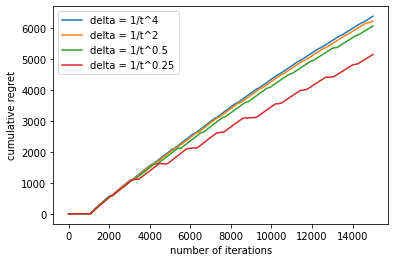

In [0]:

plt.plot(np.cumsum(regretsUCB2), label = "delta = 1/t^4")
plt.plot(np.cumsum(regretsUCB1), label = "delta = 1/t^2")
plt.plot(np.cumsum(regretsUCB5), label = "delta = 1/t^0.5")
plt.plot(np.cumsum(regretsUCB4), label = "delta = 1/t^0.25")
# plt.plot(np.cumsum(regretsEpsilon3), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("cumulative regret")

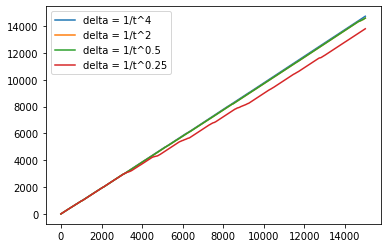

In [0]:

plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsUCB2), label = "delta = 1/t^4")
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsUCB1), label = "delta = 1/t^2")
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsUCB1), label = "delta = 1/t^0.5")
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsUCB4), label = "delta = 1/t^0.25")
plt.legend()

Text(0, 0.5, 'cumulative regret')

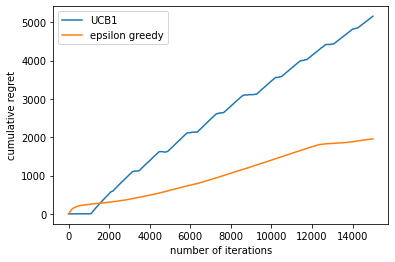

In [0]:
plt.plot(np.cumsum(regretsUCB4), label = "UCB1")
plt.plot(np.cumsum(regretsEpsilon3), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("cumulative regret")

Text(0, 0.5, 'cumulative loss')

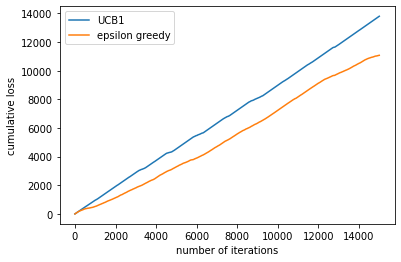

In [0]:
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsUCB4), label = "UCB1")
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsEpsilon3), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("cumulative loss")

Text(0, 0.5, 'reward')

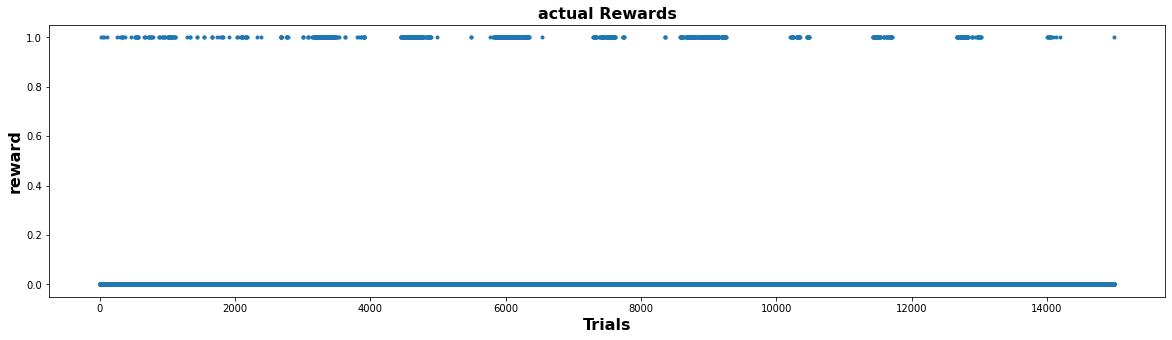

In [0]:
x_ax = np.arange(recommendationMoviesDf.shape[1])
cmap = plt.get_cmap("tab10", 3)
plt.figure(figsize=(20,5))
plt.scatter(x_ax,actualRewardsUCB4, cmap=cmap, marker=".", alpha=1)
# plt.scatter(x_ax, actualRewardsEpsilon2, cmap = cmap, marker = "+", alpha = 0.2)
plt.title("actual Rewards", fontsize=16, fontweight="bold")
plt.xlabel("Trials", fontsize=16, fontweight="bold")
plt.ylabel("reward", fontsize=16, fontweight="bold")


In [0]:
print(np.sum(actualRewardsUCB4))

1198.0


In [0]:
print(np.sum(regretsUCB4))

5158.0158730589765


###Thompson Sampling


In [0]:
def ThomsonSampling(numArms, numTrials, dataFrame):
  actualRewards = np.zeros(numTrials)
  S = np.zeros(numArms)
  F = np.zeros(numArms)
  expectedPartialRewards = np.zeros((numArms))
  selectionFrequency = np.ones((numArms))
  positiveRewardFrequency = np.zeros((numArms))
  expectedFullRewards = np.zeros((numArms))
  regrets = np.zeros(numTrials)
  for i in range(numTrials):
    theta = np.random.beta(S+1,F+1)
    selectedArmIndex = np.argmax(theta)
    actualRewards[i] = dataFrame.iloc[selectedArmIndex, i]
    if actualRewards[i] == 1.0:
      S[selectedArmIndex]+=1
      positiveRewardFrequency[selectedArmIndex]+=1
    else:
      F[selectedArmIndex]+=1  
    selectionFrequency[selectedArmIndex]+=1
    expectedPartialRewards = (positiveRewardFrequency/ selectionFrequency)
    expectedFullRewards += (dataFrame[i].to_numpy() - expectedFullRewards)/(i+1)
    regrets[i] = calculateInstantaneuosRegret(expectedFullRewards, expectedPartialRewards, selectedArmIndex)
  return actualRewards, regrets
    

In [0]:
actualRewardsThompson, regretsThompson = ThomsonSampling(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf)

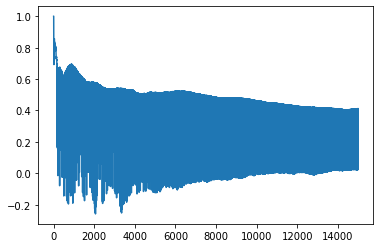

In [0]:
plt.plot(regretsThompson)

Text(0, 0.5, 'cumulative')

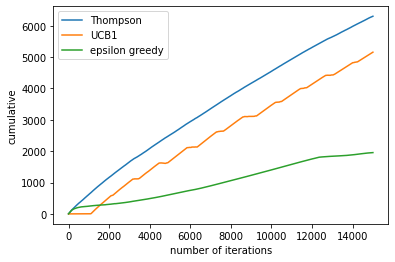

In [0]:

plt.plot(np.cumsum(regretsThompson), label = "Thompson")
plt.plot(np.cumsum(regretsUCB4), label = "UCB1")
plt.plot(np.cumsum(regretsEpsilon3), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")

plt.ylabel("cumulative")

Text(0, 0.5, 'cumulative loss over iterations')

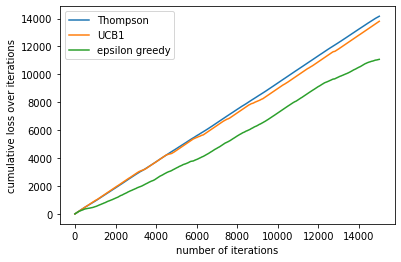

In [0]:
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsThompson), label = "Thompson")
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsUCB4), label = "UCB1")
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsEpsilon3), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("cumulative loss over iterations")

Text(0, 0.5, 'Variant')

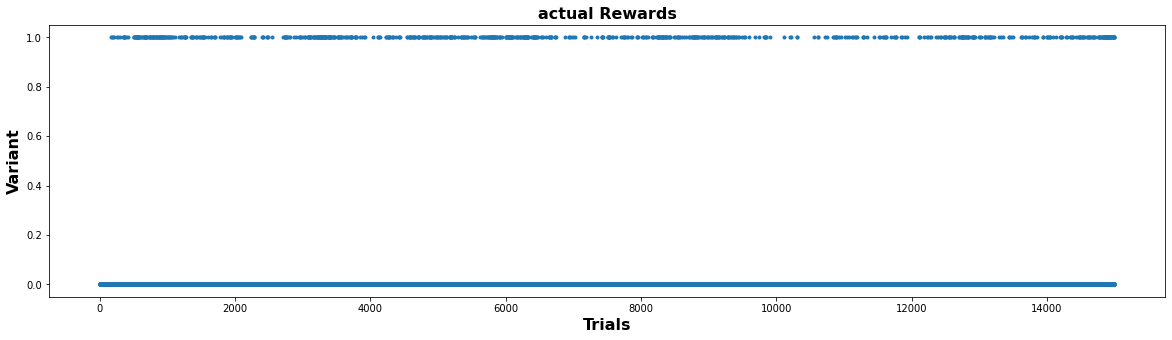

In [0]:
x_ax = np.arange(recommendationMoviesDf.shape[1])
cmap = plt.get_cmap("tab10", 3)
plt.figure(figsize=(20,5))
plt.scatter(x_ax,actualRewardsThompson, cmap=cmap, marker=".", alpha=1)
# plt.scatter(x_ax, actualRewardsEpsilon2, cmap = cmap, marker = "+", alpha = 0.2)
plt.title("actual Rewards", fontsize=16, fontweight="bold")
plt.xlabel("Trials", fontsize=16, fontweight="bold")
plt.ylabel("Variant", fontsize=16, fontweight="bold")


In [0]:
print(np.sum(actualRewardsThompson))

837.0


In [0]:
print(np.sum(regretsThompson))

6304.597185857225


###EXP3


In [0]:
def exp3_partial_feedback(dataFrame):
  dataFrame = np.array(dataFrame)
  k = dataFrame.shape[0]
  T = dataFrame.shape[1]
  t = np.arange(1,T+1)
  t = np.sqrt(1/t)
  eta = (np.sqrt(np.log(k) / k*t))
  p_t = np.full((k), 1/k)
  L_t = np.zeros(k)
  L_accu = np.zeros(k)
  total_reward = 0
  regret_arr = []
  actual_loss = 0
  best_loss = 0
  diff_loss = 0
  loss_arr = []
  actual_rew = np.zeros(T)
  for t in range(T): 
    arm_i = np.random.choice(k,1,p=p_t)[0]
    L_accu += 1 - dataFrame[:,t]

    cur_reward = dataFrame[arm_i,t]
    actual_rew[t] = cur_reward
    total_reward += cur_reward

    best_arm = np.argmin(L_accu)
    actual_loss += 1 - dataFrame[arm_i,t]
    best_loss = L_accu[best_arm]

    diff_loss = actual_loss - best_loss
    regret_arr.append(diff_loss / (t+1))


    l_it_hat = (1 - dataFrame[arm_i,t])/p_t[arm_i]
    L_t[arm_i] += l_it_hat
    temp = np.exp(-eta[t] * np.array(L_t))
    p_t = temp / np.sum(temp)
    loss_arr.append(diff_loss)

  return regret_arr, total_reward, loss_arr, actual_rew


In [0]:
exp3_partial_regret_arr, exp3_partial_total_reward, exp3_partial_loss_arr, actualRewardsEXP3 = exp3_partial_feedback(recommendationMoviesDf)

In [0]:
print(np.sum(exp3_partial_regret_arr))

6702.733071606981


In [0]:
print(np.sum(exp3_partial_total_reward))

519.0


Text(0.5, 1.0, 'Exp3 - Partial Feedback - Regret')

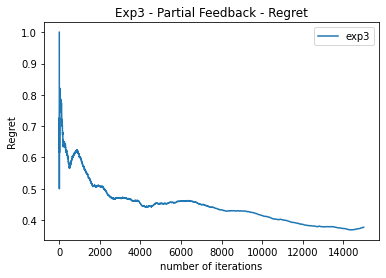

In [0]:
plt.plot(exp3_partial_regret_arr, label = "exp3")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("Regret")
plt.title("Exp3 - Partial Feedback - Regret")

Text(0.5, 1.0, 'Exp3 - Partial Feedback - Cumulative Regret')

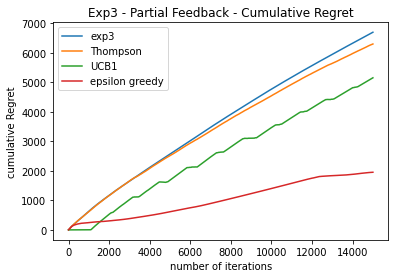

In [0]:
plt.plot(np.cumsum(exp3_partial_regret_arr), label = "exp3")
plt.plot(np.cumsum(regretsThompson), label = "Thompson")
plt.plot(np.cumsum(regretsUCB4), label = "UCB1")
plt.plot(np.cumsum(regretsEpsilon3), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("cumulative Regret")
plt.title("Exp3 - Partial Feedback - Cumulative Regret")

Text(0.5, 1.0, 'Exp3 - Partial Feedback - Cumulative Loss')

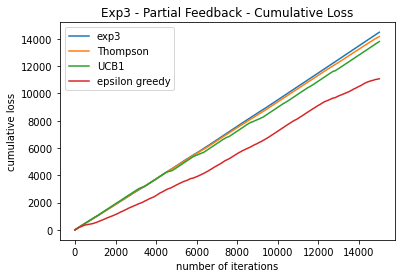

In [0]:
plt.plot((np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsEXP3)), label = "exp3")
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsThompson), label = "Thompson")
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsUCB4), label = "UCB1")
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsEpsilon3), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("cumulative loss")
plt.title("Exp3 - Partial Feedback - Cumulative Loss")

##**Full Feedback**

###Epsilon Greedy



In [0]:
def epsilonGreedyFull(numArms, numTrials, dataFrame, epsilonMult = 100): 
  expectedFullRewards = np.zeros(numArms)
  actualRewards = np.zeros(numTrials)
  regrets = np.zeros(numTrials)
  explr = 0
  explt = 0
  for trialIter in range(numTrials):
    epsilon = (epsilonMult /(trialIter+1))
    r = random.random()
    # print(r, epsilon)
    if(r<epsilon):
      # print("explore")
      explr+=1
      selectedArmIndex = np.random.randint(0,numArms,1)
    else:
      # print("exploit")
      explt+=1
      selectedArmIndex = np.argmax(expectedFullRewards)
    
    actualRewards[trialIter] = dataFrame.iloc[selectedArmIndex, trialIter]
    # if(actualRewards[trialIter] == 1.0):
    #     positiveRewardFrequencyForArms[selectedArmIndex]+=1
    # selectionFrequencyForArms[selectedArmIndex]+=1

    expectedFullRewards  +=(dataFrame[trialIter].to_numpy() - expectedFullRewards)/ (trialIter+1)
    # print("expected full res", expectedFullRewards)

    # expectedPartialRewards = (positiveRewardFrequencyForArms/ selectionFrequencyForArms)
    regrets[trialIter] = calculateInstantaneuosRegret(expectedFullRewards, expectedFullRewards, selectedArmIndex)
    # print(regrets[trialIter], np.sum(expectedFullRewards), np.sum(expectedPartialRewards))
    # if(trialIter == 2):
      # break
  # print("explr", explr, "Explt", explt)
  # print(regrets)
  # print("------------------------------")
  return actualRewards, regrets


In [0]:
actualRewardsEpsilonFull1, regretsEpsilonFull1 = epsilonGreedyFull(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, 1)
actualRewardsEpsilonFull2, regretsEpsilonFull2 = epsilonGreedyFull(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, 10)
actualRewardsEpsilonFull3, regretsEpsilonFull3 = epsilonGreedyFull(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, 100)
actualRewardsEpsilonFull4, regretsEpsilonFull4 = epsilonGreedyFull(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, 1000)

Text(0.5, 1.0, 'Regret - Epsilon Greedy - Full Feedback, epsilon = 1/t')

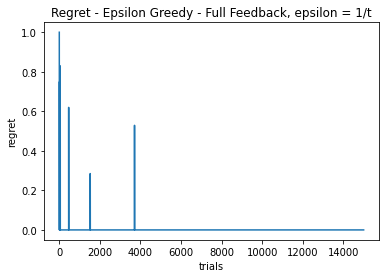

In [0]:
plt.plot(regretsEpsilonFull1)
plt.xlabel("trials")
plt.ylabel("regret")
plt.title("Regret - Epsilon Greedy - Full Feedback, epsilon = 1/t")

Text(0.5, 1.0, 'Regret - Epsilon Greedy - Full Feedback, epsilon = 10/t')

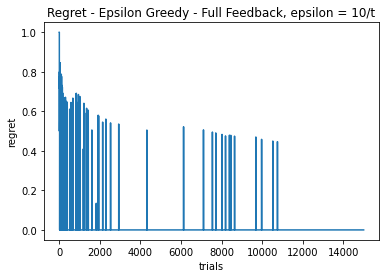

In [0]:
plt.plot(regretsEpsilonFull2)
plt.xlabel("trials")
plt.ylabel("regret")
plt.title("Regret - Epsilon Greedy - Full Feedback, epsilon = 10/t")

Text(0.5, 1.0, 'Regret - Epsilon Greedy - Full Feedback, epsilon = 100/t')

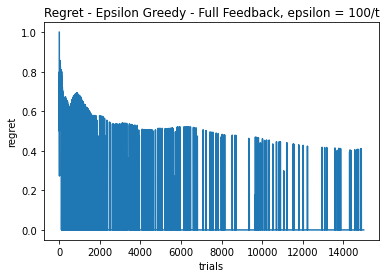

In [0]:
plt.plot(regretsEpsilonFull3)
plt.xlabel("trials")
plt.ylabel("regret")
plt.title("Regret - Epsilon Greedy - Full Feedback, epsilon = 100/t")

Text(0.5, 1.0, 'Regret - Epsilon Greedy - Full Feedback, epsilon = 1000/t')

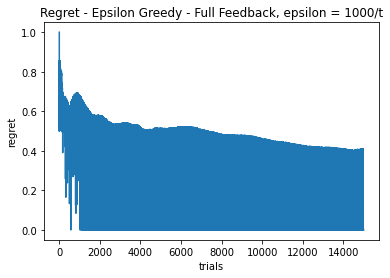

In [0]:
plt.plot(regretsEpsilonFull4)
plt.xlabel("trials")
plt.ylabel("regret")
plt.title("Regret - Epsilon Greedy - Full Feedback, epsilon = 1000/t")

Text(0.5, 1.02, 'effect of changing epsilon on regret')

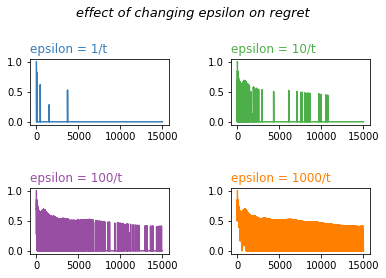

In [0]:
regretsFull = np.zeros((4, regretsEpsilonFull1.shape[0]))
regretsFull[0] = regretsEpsilonFull1
regretsFull[1] = regretsEpsilonFull2
regretsFull[2] = regretsEpsilonFull3
regretsFull[3] = regretsEpsilonFull4
lebels = ["epsilon = 1/t", "epsilon = 10/t", "epsilon = 100/t", "epsilon = 1000/t"]
palette = plt.get_cmap('Set1')
for num in range(1,5):
  plt.subplot(2,2, num)
  plt.plot(regretsFull[num-1], color=palette(num), label = lebels[num-1])
  plt.title(lebels[num-1], loc='left', fontsize=12, fontweight=0, color=palette(num))
  plt.tight_layout(pad=3.0)
plt.suptitle("effect of changing epsilon on regret", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)


Text(0, 0.5, 'cumulative')

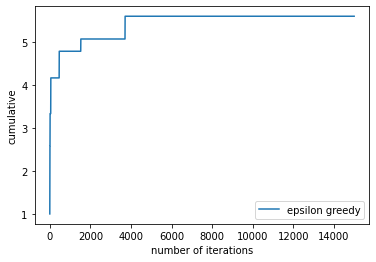

In [0]:
plt.plot(np.cumsum(regretsEpsilonFull1), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("cumulative")

Text(0, 0.5, 'cumulative')

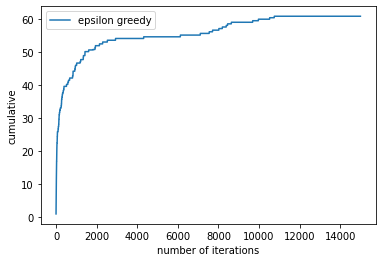

In [0]:
plt.plot(np.cumsum(regretsEpsilonFull2), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("cumulative")

Text(0, 0.5, 'cumulative')

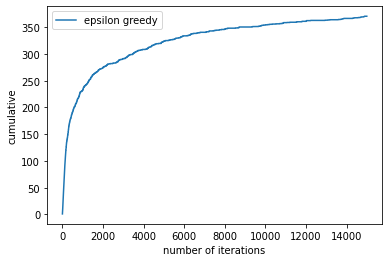

In [0]:
plt.plot(np.cumsum(regretsEpsilonFull3), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("cumulative")

Text(0, 0.5, 'cumulative')

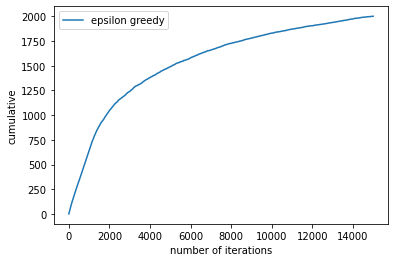

In [0]:
plt.plot(np.cumsum(regretsEpsilonFull4), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("cumulative")

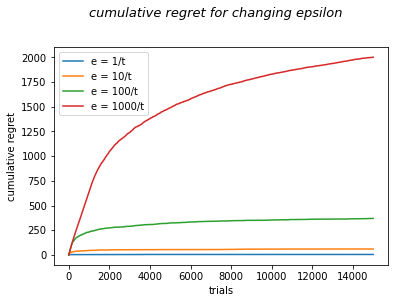

In [0]:
plt.plot(np.cumsum(regretsEpsilonFull1), label = "e = 1/t")
plt.plot(np.cumsum(regretsEpsilonFull2), label = "e = 10/t")
plt.plot(np.cumsum(regretsEpsilonFull3), label = "e = 100/t")
plt.plot(np.cumsum(regretsEpsilonFull4), label = "e = 1000/t")
plt.xlabel("trials")
plt.ylabel("cumulative regret")
plt.legend()
plt.suptitle("cumulative regret for changing epsilon", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
plt.show()

Text(0, 0.5, 'Variant')

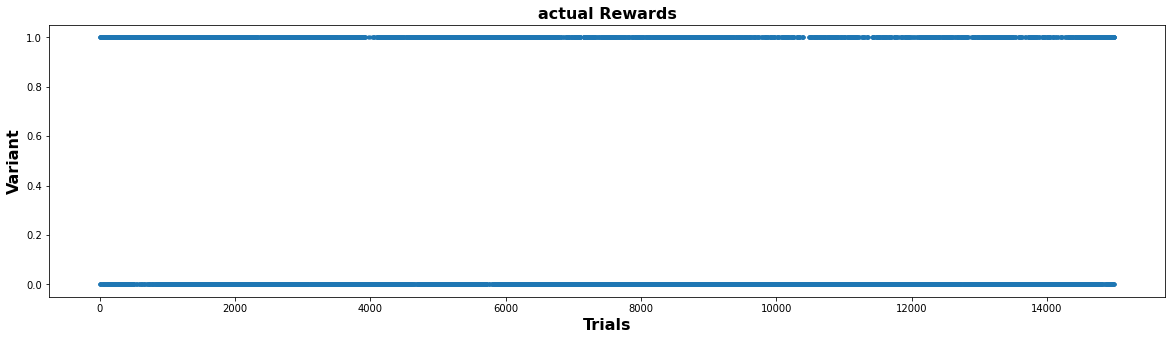

In [0]:
x_ax = np.arange(recommendationMoviesDf.shape[1])
cmap = plt.get_cmap("tab10", 3)
plt.figure(figsize=(20,5))
plt.scatter(x_ax,actualRewardsEpsilonFull1, cmap=cmap, marker=".", alpha=1)
plt.title("actual Rewards", fontsize=16, fontweight="bold")
plt.xlabel("Trials", fontsize=16, fontweight="bold")
plt.ylabel("Variant", fontsize=16, fontweight="bold")



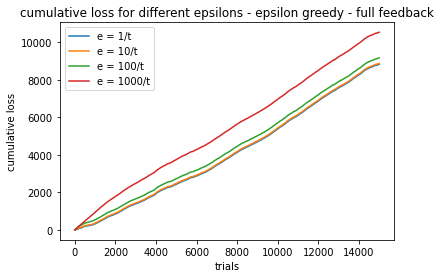

In [0]:
lossesFull1 = np.cumsum(np.ones(recommendationMoviesDf.shape[1]) - actualRewardsEpsilonFull1)
lossesFull2 = np.cumsum(np.ones(recommendationMoviesDf.shape[1]) - actualRewardsEpsilonFull2)
lossesFull3 = np.cumsum(np.ones(recommendationMoviesDf.shape[1]) - actualRewardsEpsilonFull3)
lossesFull4 = np.cumsum(np.ones(recommendationMoviesDf.shape[1]) - actualRewardsEpsilonFull4)
plt.xlabel("trials")
plt.ylabel("cumulative loss")
plt.title("cumulative loss for different epsilons - epsilon greedy - full feedback")
plt.plot(lossesFull1, label = "e = 1/t")
plt.plot(lossesFull2, label = "e = 10/t")
plt.plot(lossesFull3, label = "e = 100/t")
plt.plot(lossesFull4, label = "e = 1000/t")
plt.legend()

In [0]:
print(np.sum(actualRewardsEpsilonFull3))

5825.0


In [0]:
print(np.sum(regretsEpsilonFull3))

370.6214717346058


###UCB1



In [0]:
def UCB1Full(numArms, numTrials, dataFrame):
  actualRewards = np.zeros((numTrials))
  expectedFullRewards = np.zeros((numArms))
  selectionFrequency = np.zeros((numArms))
  regrets = np.zeros((numTrials))
 
  for k in range(numArms):
    expectedFullRewards += (dataFrame[k].to_numpy() - expectedFullRewards)/(k+1)
    actualRewards[k] = dataFrame.iloc[k,k]
    selectionFrequency[k]+=1
    regrets[k] = calculateInstantaneuosRegret(expectedFullRewards,  expectedFullRewards, k)

  for t in range(numArms+1, numTrials):
    explorationTermForArms = np.sqrt(np.ones(numArms)*2*np.log(t)/selectionFrequency)
    UCB = expectedFullRewards + explorationTermForArms
    
    winners = np.argwhere(UCB == np.amax(UCB))
    # armSelectedIndex =  np.argmax(expectedRewardsForArms[winners])
    val = random.randint(0,len(winners)-1)
    armSelectedIndex = winners[val]
    # armSelectedIndex = np.argmax(UCB)
    # print("t:", t, "selection freq", selection)
    actualRewards[t] = dataFrame.iloc[armSelectedIndex, t]
    selectionFrequency +=1
    expectedFullRewards += (dataFrame[t].to_numpy() - expectedFullRewards)/(t+1)
    regrets[t] = calculateInstantaneuosRegret(expectedFullRewards,  expectedFullRewards, armSelectedIndex)
  
  return actualRewards, regrets

In [0]:
actualRewardsUCBFull, regretsUCBFull = UCB1Full(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf)

In [0]:
print(np.sum(actualRewardsUCBFull))

5530.0


Text(0.5, 1.0, 'instantaneous regret UCB1 Full Feedback')

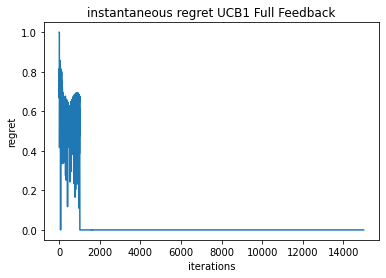

In [0]:
plt.plot(regretsUCBFull)
plt.xlabel("iterations")
plt.ylabel("regret")
plt.title("instantaneous regret UCB1 Full Feedback")

Text(0, 0.5, 'cumulative')

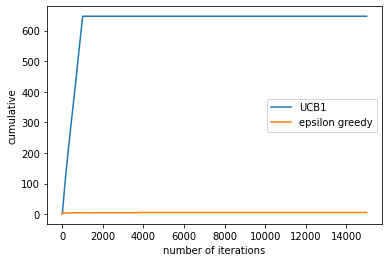

In [0]:
plt.plot(np.cumsum(regretsUCBFull), label = "UCB1")
plt.plot(np.cumsum(regretsEpsilonFull1), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("cumulative")

In [0]:
np.sum(regretsUCBFull)

646.9970918360648

Text(0, 0.5, 'cumulative loss')

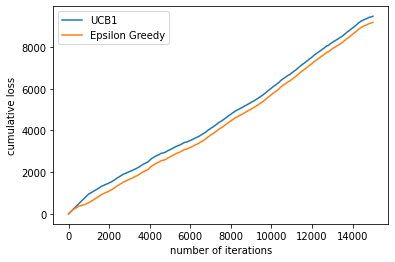

In [0]:
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsUCBFull), label = "UCB1")
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsEpsilonFull3), label = "Epsilon Greedy")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("cumulative loss")

Text(0, 0.5, 'Reward')

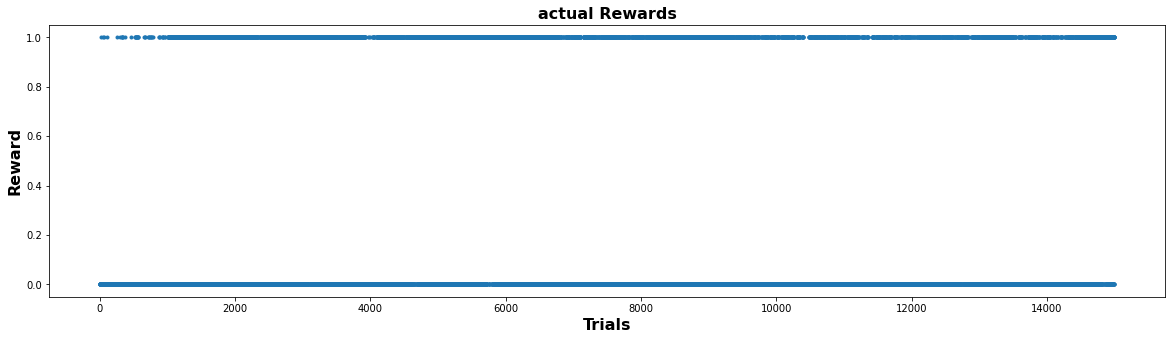

In [0]:
x_ax = np.arange(recommendationMoviesDf.shape[1])
cmap = plt.get_cmap("tab10", 3)
plt.figure(figsize=(20,5))
plt.scatter(x_ax,actualRewardsUCBFull, cmap=cmap, marker=".", alpha=1)
# plt.scatter(x_ax, actualRewardsEpsilon2, cmap = cmap, marker = "+", alpha = 0.2)
plt.title("actual Rewards", fontsize=16, fontweight="bold")
plt.xlabel("Trials", fontsize=16, fontweight="bold")
plt.ylabel("Reward", fontsize=16, fontweight="bold")


###Thompson Sampling


In [0]:
def ThomsonSamplingFull(numArms, numTrials, dataFrame):
  actualRewards = np.zeros(numTrials)
  S = np.zeros(numArms)
  F = np.zeros(numArms)
  expectedFullRewards = np.zeros((numArms))
  regrets = np.zeros(numTrials)
  for i in range(numTrials):
    theta = np.random.beta(S+1,F+1)
    selectedArmIndex = np.argmax(theta)
    actualRewards[i] = dataFrame.iloc[selectedArmIndex, i]
    actualValues = dataFrame[i].to_numpy()
    S[actualValues ==1.0] +=1
    F[actualValues ==0.0]+=1
    expectedFullRewards += (actualValues - expectedFullRewards)/(i+1)
    regrets[i] = calculateInstantaneuosRegret(expectedFullRewards, expectedFullRewards, selectedArmIndex)
  return actualRewards, regrets
    

In [0]:
actualRewardsThompsonFull, regretsThompsonFull = ThomsonSamplingFull(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf)

Text(0.5, 1.0, 'instantaneouos regret thompson sampling')

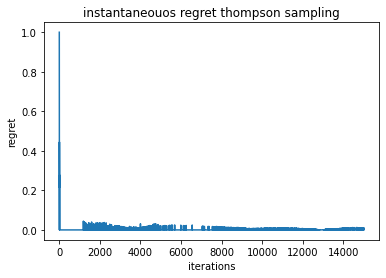

In [0]:
plt.plot(regretsThompsonFull)
plt.xlabel("iterations")
plt.ylabel("regret")
plt.title("instantaneouos regret thompson sampling")

Text(0, 0.5, 'cumulative regret')

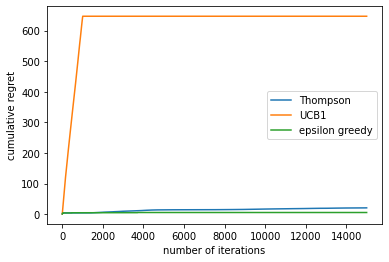

In [0]:

plt.plot(np.cumsum(regretsThompsonFull), label = "Thompson")
plt.plot(np.cumsum(regretsUCBFull), label = "UCB1")
plt.plot(np.cumsum(regretsEpsilonFull1), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")

plt.ylabel("cumulative regret")

Text(0, 0.5, 'cumulative loss over iterations')

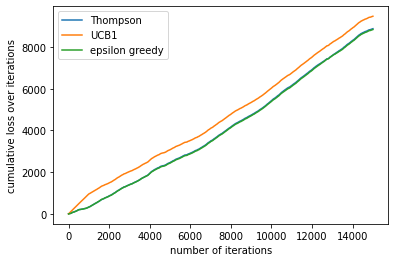

In [0]:
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsThompsonFull), label = "Thompson")
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsUCBFull), label = "UCB1")
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsEpsilonFull1), label = "epsilon greedy")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("cumulative loss over iterations")

Text(0, 0.5, 'Reward')

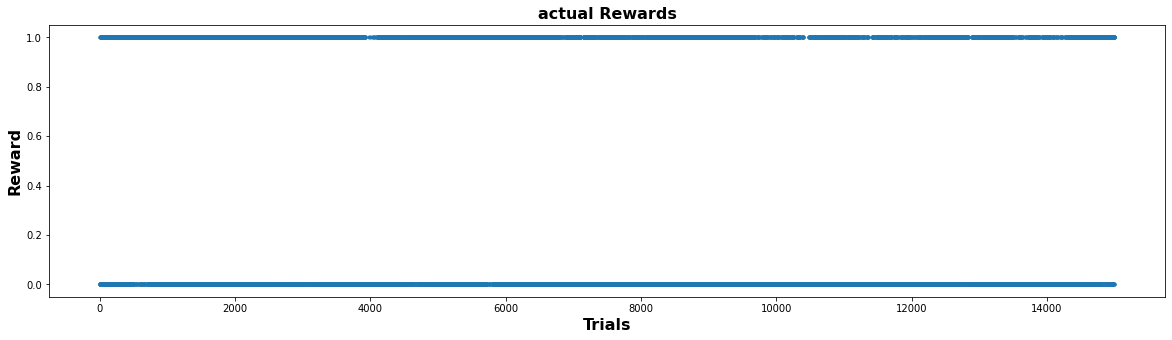

In [0]:
x_ax = np.arange(recommendationMoviesDf.shape[1])
cmap = plt.get_cmap("tab10", 3)
plt.figure(figsize=(20,5))
plt.scatter(x_ax,actualRewardsThompsonFull, cmap=cmap, marker=".", alpha=1)
# plt.scatter(x_ax, actualRewardsEpsilon2, cmap = cmap, marker = "+", alpha = 0.2)
plt.title("actual Rewards", fontsize=16, fontweight="bold")
plt.xlabel("Trials", fontsize=16, fontweight="bold")
plt.ylabel("Reward", fontsize=16, fontweight="bold")


In [0]:
print(np.sum(actualRewardsThompsonFull))

6127.0


In [0]:
print(np.sum(regretsThompsonFull))

20.79523407065208


###Multiplicative Weight Update

In [0]:
def multiplicativeFullFeedback(numArms, numTrials, dataFrame):
  expectedFullRewards = np.zeros(numArms)
  w = np.ones(numArms)
  regrets = np.zeros(numTrials)
  actualRewards = np.zeros(numTrials)
  for t in range(numTrials):
    eta = 1/np.sqrt(t+1)
    p_t = w / (np.sum(w))
    arm_i = np.random.choice(numArms,1,p=p_t)[0]
    actualRewards[t] = dataFrame.iloc[arm_i, t]
    L_t = np.ones(numArms) - dataFrame[t].to_numpy()
    expectedFullRewards += (dataFrame[t].to_numpy() - expectedFullRewards)/(t+1)
    w = w*(1-eta*L_t)
    regrets[t] = calculateInstantaneuosRegret(expectedFullRewards, expectedFullRewards, arm_i)
  return actualRewards, regrets


In [0]:
actualRewardsMultiplicative, regretsMultiplicative = multiplicativeFullFeedback(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf)

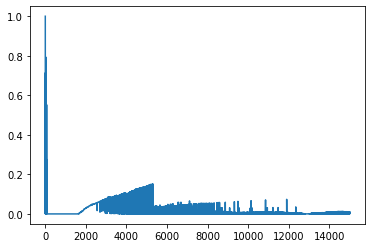

In [0]:
plt.plot(regretsMultiplicative)

Text(0, 0.5, 'cumulative regret')

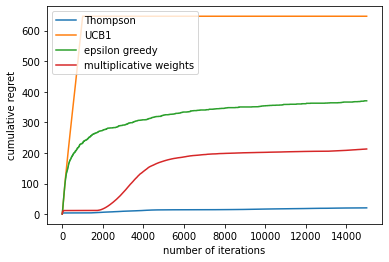

In [0]:

plt.plot(np.cumsum(regretsThompsonFull), label = "Thompson")
plt.plot(np.cumsum(regretsUCBFull), label = "UCB1")
plt.plot(np.cumsum(regretsEpsilonFull3), label = "epsilon greedy")
plt.plot(np.cumsum(regretsMultiplicative), label = "multiplicative weights")
plt.legend()
plt.xlabel("number of iterations")

plt.ylabel("cumulative regret")


Text(0, 0.5, 'cumulative loss over iterations')

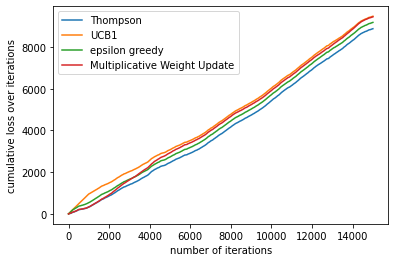

In [0]:
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsThompsonFull), label = "Thompson")
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsUCBFull), label = "UCB1")
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsEpsilonFull3), label = "epsilon greedy")
plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsMultiplicative), label = "Multiplicative Weight Update")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("cumulative loss over iterations")


In [0]:
# def exp3_fully_feedback(dataFrame):
#   dataFrame = np.array(dataFrame)
#   k = dataFrame.shape[0]
#   T = dataFrame.shape[1]
  
#   p_t = np.zeros(k)
#   w = np.ones(k)
#   L_t = np.zeros(k)
#   total_reward = 0
#   reward = np.zeros(k)
#   regret_arr = []
#   actual_loss = 0
#   best_loss = 0
#   diff_loss = 0
#   loss_arr = []
  
#   for t in range(T): 
#     eta = 1 / np.sqrt(t+1)
#     p_t = w / np.sum(w)
#     arm_i = np.random.choice(k,1,p=p_t)[0]
#     L_t += 1 - dataFrame[:,t]

#     cur_reward = dataFrame[arm_i,t]
#     total_reward += cur_reward

#     best_arm = np.argmin(L_t)
#     actual_loss += 1 - dataFrame[arm_i,t]
#     best_loss = L_t[best_arm]
#     diff_loss = actual_loss - best_loss
#     regret_arr.append(diff_loss / (t+1))
#     loss_arr.append(diff_loss)

#     L = 1 - dataFrame[:,t] 
#     w = w*(1-eta*np.array(L))

#   return regret_arr, total_reward, loss_arr



In [0]:
# exp3_fully_regret_arr, exp3_fully_total_reward, exp3_fully_loss_arr = exp3_fully_feedback(recommendationMoviesDf)

In [0]:
# plt.plot(exp3_fully_regret_arr, label = "exp3")
# plt.legend()
# plt.xlabel("number of iterations")
# plt.ylabel("Regret")
# plt.title("Exp3 - Fully Feedback - Regret")

In [0]:

# # plt.plot(np.cumsum(regretsThompsonFull), label = "Thompson")
# # plt.plot(np.cumsum(regretsUCBFull), label = "UCB1")
# # plt.plot(np.cumsum(regretsEpsilonFull3), label = "epsilon greedy")
# plt.plot(np.cumsum(exp3_fully_regret_arr), label = "MIA multiplicative weights update")
# plt.plot(np.cumsum(regretsMultiplicative), label = "TJ multiplicative weights update")
# plt.legend()
# plt.xlabel("number of iterations")
# plt.ylabel("cumulative Regret")
# plt.title("Exp3 - Fully Feedback - Cumulative Regret")

In [0]:
# plt.plot(exp3_fully_loss_arr, label = "multiplicative weight update")
# plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsThompsonFull), label = "Thompson")
# plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsUCBFull), label = "UCB1")
# plt.plot(np.cumsum(np.ones((recommendationMoviesDf.shape[1])) - actualRewardsEpsilonFull3), label = "epsilon greedy")
# plt.legend()
# plt.xlabel("number of iterations")
# plt.ylabel("cumulative loss over iterations")
# plt.legend()
# plt.xlabel("number of iterations")
# plt.ylabel("cumulative loss")
# plt.title("Exp3 - Partial Feedback - Cumulative Loss")

In [0]:
# print(exp3_fully_total_reward)

In [0]:
# print(np.sum(exp3_fully_regret_arr))

##**Tracking Top 10 movies/arms**



In [0]:
def findTopTenMovies(dataFrame):
  dataFrame = np.array(dataFrame)
  summation = np.sum(dataFrame, axis=1)
  topTenIndices = np.zeros(10)
  topTenValues = np.zeros(10)
  topTenIndices = (np.argsort(summation)[-10:])  
  topTenValues = (summation[np.argsort(summation)[-10:]])  
  return topTenIndices, topTenValues


In [0]:
topTenIndices, topTenValues = findTopTenMovies(recommendationMoviesDf)

In [0]:
print(topTenIndices)

[806 778  15 211 406 160 968 887 328 107]


In [0]:
print(topTenValues)

[3558. 3812. 4172. 4369. 4684. 4730. 5243. 5510. 6016. 6174.]


In [0]:
def exp3_fully_feedback_Recco(dataFrame, bestArms):
  dataFrame = np.array(dataFrame)
  k = dataFrame.shape[0]
  T = dataFrame.shape[1]
  
  p_t = np.zeros(k)
  w = np.ones(k)
  L_t = np.zeros(k)
  total_reward = 0
  reward = np.zeros(k)
  regret_arr = []
  actual_loss = 0
  best_loss = 0
  diff_loss = 0
  loss_arr = []
  bestRecommendation = np.zeros((10, T))
  for t in range(T): 
    eta = 1 / np.sqrt(t+1)
    p_t = w / np.sum(w)
    bestRecommendation[:,t] =  p_t[bestArms]
    arm_i = np.random.choice(k,1,p=p_t)[0]
    L_t += 1 - dataFrame[:,t]

    cur_reward = dataFrame[arm_i,t]
    total_reward += cur_reward

    best_arm = np.argmin(L_t)
    actual_loss += 1 - dataFrame[arm_i,t]
    best_loss = L_t[best_arm]
    diff_loss = actual_loss - best_loss
    regret_arr.append(diff_loss / (t+1))
    loss_arr.append(diff_loss)

    L = 1 - dataFrame[:,t] 
    w = w*(1-eta*np.array(L))

  return regret_arr, total_reward, loss_arr, bestRecommendation



In [0]:
_,_,_,best = exp3_fully_feedback_Recco(recommendationMoviesDf, topTenIndices)

In [0]:
# print(np.sum(best, axis =1))

Text(0.5, 1.0, 'tracking top ten movies')

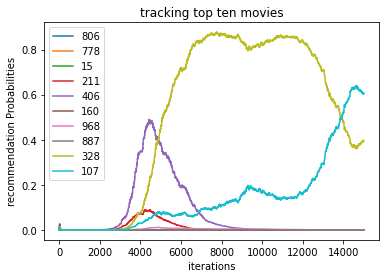

In [0]:
plt.plot(best[0], label = ""+str(topTenIndices[0]))
plt.plot(best[1], label = ""+str(topTenIndices[1]))
plt.plot(best[2], label = ""+str(topTenIndices[2]))
plt.plot(best[3], label = ""+str(topTenIndices[3]))
plt.plot(best[4], label = ""+str(topTenIndices[4]))
plt.plot(best[5], label = ""+str(topTenIndices[5]))
plt.plot(best[6], label = ""+str(topTenIndices[6]))
plt.plot(best[7], label = ""+str(topTenIndices[7]))
plt.plot(best[8], label = ""+str(topTenIndices[8]))
plt.plot(best[9], label = ""+str(topTenIndices[9]))
plt.legend()

plt.ylabel("recommendation Probabilities")
plt.xlabel("iterations")
plt.title("tracking top ten movies")

##**Main**

In [0]:
def main():

  recommendationMoviesDf = pd.read_csv(recommendationMoviesPath, header=None)
  recommendationMoviesDf.head(10)
  print("***************************partial Feedback***********************************************")
  print("1. epsilon greedy")
  actualRewardsEpsilon1,  regretsEpsilon1 = epsilonGreedyNew(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, epsilonMult=1)
  print("total rewards:", np.sum(actualRewardsEpsilon1))
  print("total regrets:", np.sum(regretsEpsilon1))
  print("2. UCB1")
  actualRewardsUCB1, regretsUCB1 = UCB1(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, 1)
  print("total rewards:", np.sum(actualRewardsUCB1))
  print("total regrets:", np.sum(regretsUCB1))
  print("3. Thompson Sampling")
  actualRewardsThompson, regretsThompson = ThomsonSampling(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf)
  print("total rewards:", np.sum(actualRewardsThompson))
  print("total regrets:", np.sum(regretsThompson))
  print("4. EXP3")
  exp3_partial_regret_arr, exp3_partial_total_reward, exp3_partial_loss_arr, actualRewardsEXP3 = exp3_partial_feedback(recommendationMoviesDf)
  print("total rewards:", np.sum(actualRewardsEXP3))
  print("total regrets:", np.sum(exp3_partial_regret_arr))
  print("***************************full Feedback***********************************************")
  print("1. epsilon greedy")
  actualRewardsEpsilonFull4,  regretsEpsilonFull4 = epsilonGreedyFull(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf, epsilonMult=1000)
  print("total rewards:", np.sum(actualRewardsEpsilonFull4))
  print("total regrets:", np.sum(regretsEpsilonFull4))
  print("2. UCB1")
  actualRewardsUCB1, regretsUCBFull = UCB1Full(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf)
  print("total rewards:", np.sum(actualRewardsUCB1))
  print("total regrets:", np.sum(regretsUCBFull))
  print("3. Thompson Sampling")
  actualRewardsThompsonFull, regretsThompsonFull = ThomsonSamplingFull(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf)
  print("total rewards:", np.sum(actualRewardsThompsonFull))
  print("total regrets:", np.sum(regretsThompsonFull))
  print("4. Multiplicative Weight Update")
  actualRewardsMultiplicative, regretsMultiplicative = multiplicativeFullFeedback(recommendationMoviesDf.shape[0], recommendationMoviesDf.shape[1], recommendationMoviesDf)
  print("total rewards:", np.sum(actualRewardsMultiplicative))
  print("total regrets:", np.sum(regretsMultiplicative))


In [0]:
main()

***************************partial Feedback***********************************************
1. epsilon greedy
total rewards: 1.0
total regrets: 7484.5994320794125
2. UCB1
total rewards: 542.0
total regrets: 6120.765579866028
3. Thompson Sampling
total rewards: 645.0
total regrets: 6554.131940898053
4. EXP3
total rewards: 441.0
total regrets: 6845.658477491554
***************************full Feedback***********************************************
1. epsilon greedy
total rewards: 4436.0
total regrets: 1996.629938446875
2. UCB1
total rewards: 5530.0
total regrets: 646.9970918360648
3. Thompson Sampling
total rewards: 6120.0
total regrets: 20.62866385663857
4. Multiplicative Weight Update
total rewards: 5559.0
total regrets: 216.01764124183268
